## Analysis of Precip data
Assessment of missing precip data from various datasets by NOAA. 

In [2]:
import pandas as pd

# Identify the file path (load in from the server)
climatedata = '/Users/cmor7802/repos/sandbox/IN012190100.csv'

# Load data using Pandas
climatedata_df = pd.read_csv(climatedata, header=0)

In [3]:
climatedata_df.columns
climatedata_df.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
0,IN012190100,1901-01-01,18.533,73.85,559.0,"POONA, IN",0.0,",,I",NaN,NaN,NaN,NaN,NaN,NaN
1,IN012190100,1901-01-02,18.533,73.85,559.0,"POONA, IN",0.0,",,I",NaN,NaN,NaN,NaN,NaN,NaN
2,IN012190100,1901-01-03,18.533,73.85,559.0,"POONA, IN",0.0,",,I",NaN,NaN,NaN,NaN,NaN,NaN
3,IN012190100,1901-01-04,18.533,73.85,559.0,"POONA, IN",0.0,",,I",NaN,NaN,NaN,NaN,NaN,NaN
4,IN012190100,1901-01-05,18.533,73.85,559.0,"POONA, IN",0.0,",,I",NaN,NaN,NaN,NaN,NaN,NaN


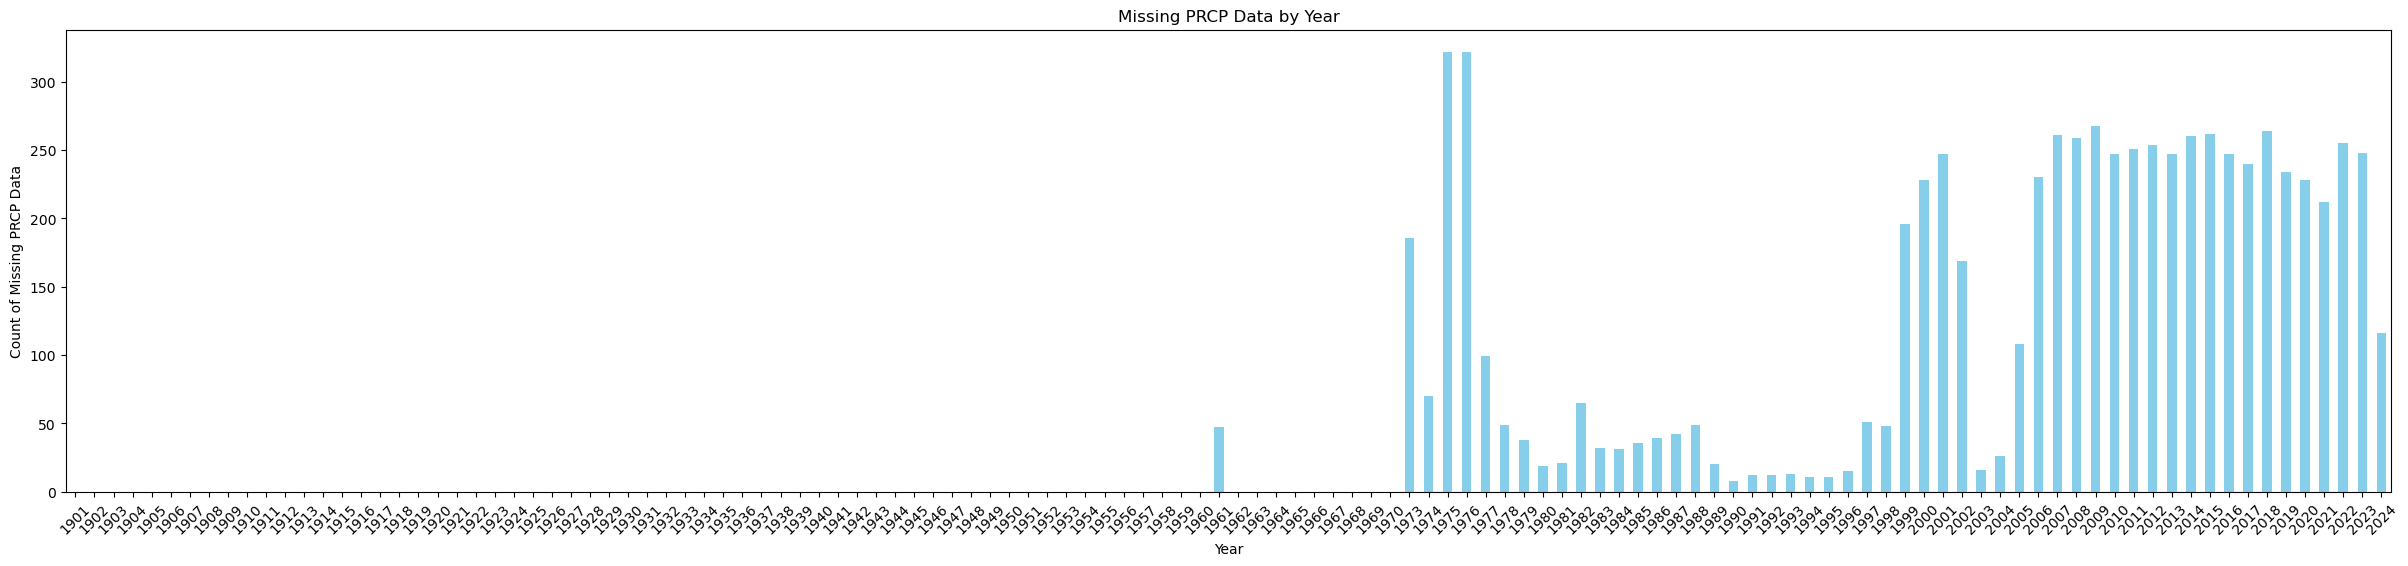

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the file
climatedata = '/Users/cmor7802/repos/sandbox/IN012190100.csv'

# Load data using Pandas
climatedata_df = pd.read_csv(climatedata, header=0)

# Check DATE is in the right format
climatedata_df['DATE'] = pd.to_datetime(climatedata_df['DATE'])

# Extract year from 'DATE'
climatedata_df['YEAR'] = climatedata_df['DATE'].dt.year

# Find rows where 'PRCP' is missing
climatedata_df['MISSING_PRCP'] = climatedata_df['PRCP'].isna()

# Group by 'YEAR' and count the number of missing 'PRCP' values
missing_prcp_by_year = climatedata_df.groupby('YEAR')['MISSING_PRCP'].sum()

# Plotting the results
plt.figure(figsize=(30, 6))
missing_prcp_by_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count of Missing PRCP Data')
plt.title('Missing PRCP Data by Year')
plt.xticks(rotation=45)
plt.show()


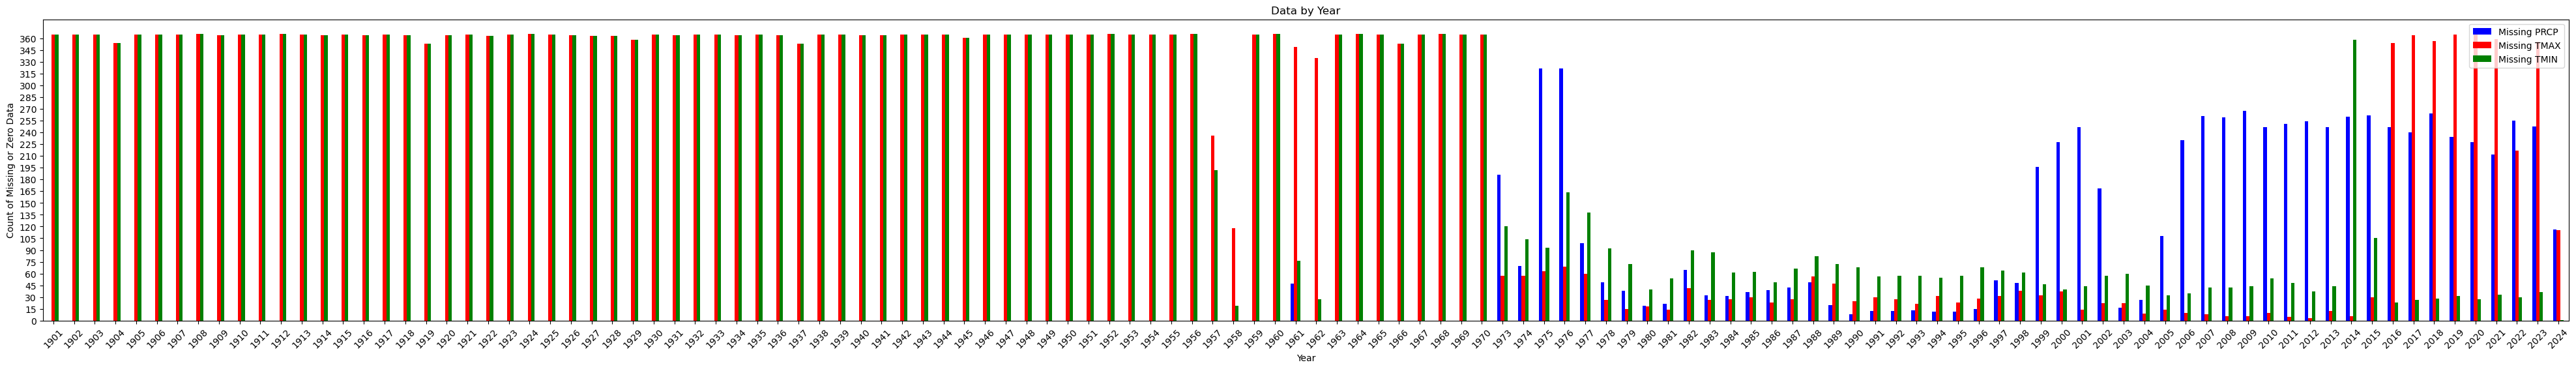

<Figure size 640x480 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the file
climatedata = '/Users/cmor7802/repos/sandbox/IN012190100.csv'

# Load data using Pandas
climatedata_df = pd.read_csv(climatedata, header=0)

# Ensure 'DATE' is in datetime format
climatedata_df['DATE'] = pd.to_datetime(climatedata_df['DATE'])

# Extract year from 'DATE'
climatedata_df['YEAR'] = climatedata_df['DATE'].dt.year

# Find rows where 'PRCP' and TMAX is missing
climatedata_df['MISSING_PRCP'] = climatedata_df['PRCP'].isna()
climatedata_df['MISSING_TMAX'] = climatedata_df['TMAX'].isna()
climatedata_df['MISSING_TMIN'] = climatedata_df['TMIN'].isna()
# climatedata_df['ZERO_PRCP'] = climatedata_df['PRCP'] == 0
# climatedata_df['ZERO_TMAX'] = climatedata_df['TMAX'] == 0
# climatedata_df['ZERO_TMIN'] = climatedata_df['TMIN'] == 0

# Group by 'YEAR' and count the number of missing 'PRCP' values
missing_data_by_year = climatedata_df.groupby('YEAR')[['MISSING_PRCP', 'MISSING_TMAX', 'MISSING_TMIN']].sum()

# 'ZERO_PRCP', 'ZERO_TMAX', 'ZERO_TMIN'

# Plotting the results
missing_data_by_year.plot(kind='bar', color=['blue', 'red', 'green'], figsize=(50, 6))
# , 'lightblue', 'mistyrose', 'lightgreen'
plt.xlabel('Year')
plt.ylabel('Count of Missing or Zero Data')
plt.title('Data by Year')
plt.legend(['Missing PRCP', 'Missing TMAX', 'Missing TMIN', 'Zero value PRCP', 'Zero value TMAX', 'Zero value TMIN'])
plt.xticks(rotation=45)

max_y = missing_data_by_year.max().max()  # Get the maximum value from the data for setting the upper limit
plt.yticks(range(0, max_y + 1, 15))  # Adjust this range and step as necessary

plt.show()

plt.savefig('data-analysis-no0s.png')

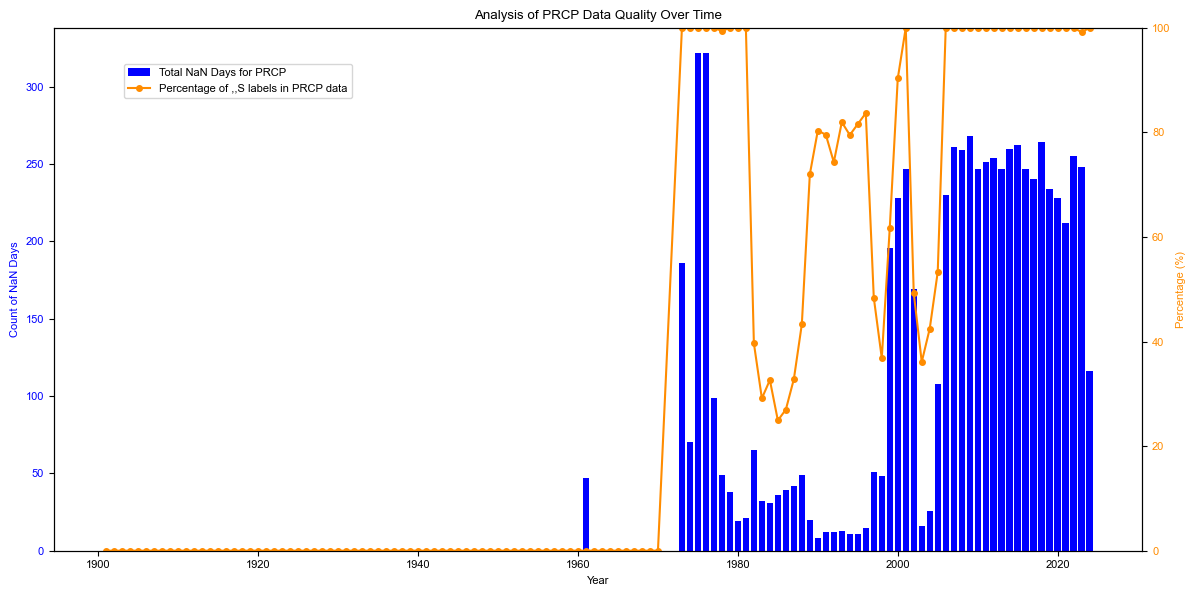

In [6]:
#ghcndaily
import pandas as pd
import matplotlib.pyplot as plt

# Identify the file path (load in from the server)
climatedata = '/Users/cmor7802/repos/sandbox/IN012190100.csv'

# Load data using Pandas
climatedata_df = pd.read_csv(climatedata, header=0)

# Set global font properties
plt.rcParams['font.size'] = 8
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.style'] = 'normal'

import pandas as pd
import matplotlib.pyplot as plt

# Assuming climatedata_df is already loaded and 'DATE' converted to datetime
climatedata_df['DATE'] = pd.to_datetime(climatedata_df['DATE'])
climatedata_df['YEAR'] = climatedata_df['DATE'].dt.year

# Calculate NaN counts for 'PRCP'
climatedata_df['IS_NAN_PRCP'] = climatedata_df['PRCP'].isna()

# Count non-missing 'PRCP'
climatedata_df['NON_MISSING_PRCP'] = ~climatedata_df['PRCP'].isna()

# Identify non-missing 'PRCP' that is exactly marked as ',,S' in 'PRCP_ATTRIBUTES'
climatedata_df['NON_MISSING_S_PRCP'] = climatedata_df['NON_MISSING_PRCP'] & (climatedata_df['PRCP_ATTRIBUTES'] == ',,S')

# Group by 'YEAR' and count NaNs for 'PRCP', non-missing, and non-missing marked as ',,S'
annual_nan_counts = climatedata_df.groupby('YEAR')['IS_NAN_PRCP'].sum()
annual_non_missing_counts = climatedata_df.groupby('YEAR')['NON_MISSING_PRCP'].sum()
annual_non_missing_s_counts = climatedata_df.groupby('YEAR')['NON_MISSING_S_PRCP'].sum()

# Calculate the percentage of non-missing 'PRCP' that is ',,S'
percentage_non_missing_s = (annual_non_missing_s_counts / annual_non_missing_counts) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for total NaN days
ax1.bar(annual_nan_counts.index, annual_nan_counts, color='blue', label='Total NaN Days for PRCP')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of NaN Days', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the percentage
ax2 = ax1.twinx()
ax2.plot(percentage_non_missing_s.index, percentage_non_missing_s, color='darkorange', marker='o', markersize=4, linestyle='-', label='Percentage of ,,S labels in PRCP data')
ax2.set_ylabel('Percentage (%)', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')
ax2.set_ylim(0, 100)  # Setting the limit of the secondary y-axis from 0 to 100%

# Title and legend
plt.title('Analysis of PRCP Data Quality Over Time')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.savefig('data-quality-analysis-incnans.png', format='png', dpi=300)

plt.show()

In [17]:
# Inspect rows where 'IS_NAN_S_PRCP' is True
print(climatedata_df[climatedata_df['IS_NAN_S_PRCP']])


           STATION       DATE  LATITUDE  LONGITUDE  ELEVATION       NAME  \
21869  IN012190100 1961-02-01    18.533      73.85      559.0  POONA, IN   
21870  IN012190100 1961-02-04    18.533      73.85      559.0  POONA, IN   
21894  IN012190100 1961-03-01    18.533      73.85      559.0  POONA, IN   
21895  IN012190100 1961-03-03    18.533      73.85      559.0  POONA, IN   
21896  IN012190100 1961-03-04    18.533      73.85      559.0  POONA, IN   
...            ...        ...       ...        ...        ...        ...   
44015  IN012190100 2024-05-05    18.533      73.85      559.0  POONA, IN   
44016  IN012190100 2024-05-06    18.533      73.85      559.0  POONA, IN   
44017  IN012190100 2024-05-07    18.533      73.85      559.0  POONA, IN   
44018  IN012190100 2024-05-08    18.533      73.85      559.0  POONA, IN   
44019  IN012190100 2024-05-09    18.533      73.85      559.0  POONA, IN   

       PRCP PRCP_ATTRIBUTES  TMAX TMAX_ATTRIBUTES   TMIN TMIN_ATTRIBUTES  \
21869   NaN

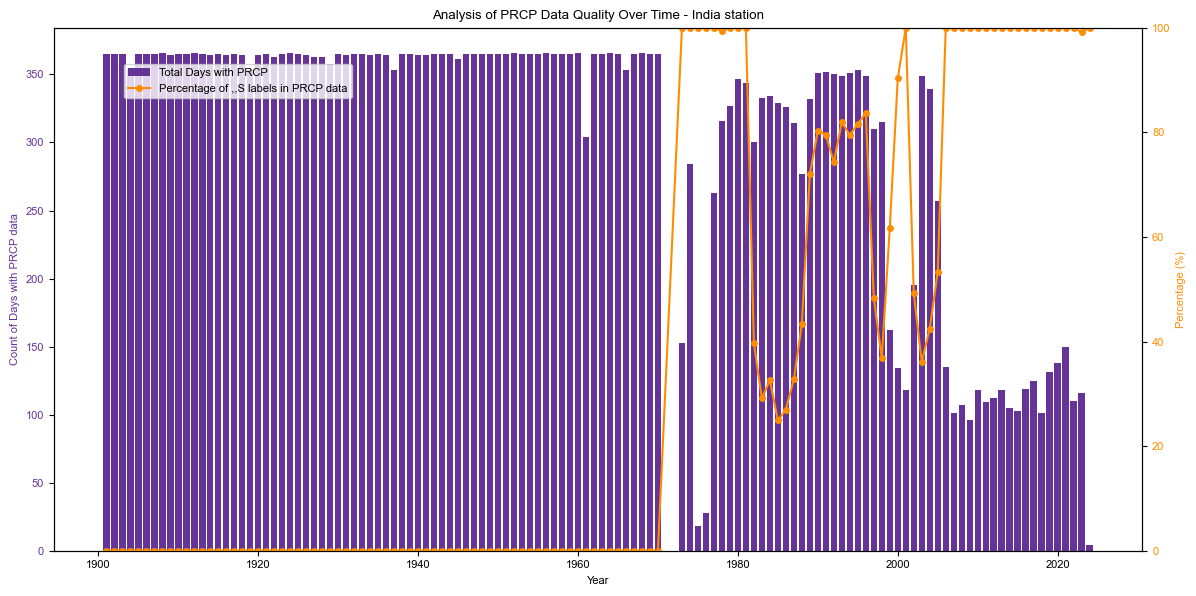

In [16]:
#ghcndaily
import pandas as pd
import matplotlib.pyplot as plt

# Identify the file path (load in from the server)
climatedata = '/Users/cmor7802/repos/sandbox/IN012190100.csv'

# Load data using Pandas
climatedata_df = pd.read_csv(climatedata, header=0)

# Set global font properties
plt.rcParams['font.size'] = 8
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.style'] = 'normal'

import pandas as pd
import matplotlib.pyplot as plt

# Assuming climatedata_df is already loaded and 'DATE' converted to datetime
climatedata_df['DATE'] = pd.to_datetime(climatedata_df['DATE'])
climatedata_df['YEAR'] = climatedata_df['DATE'].dt.year

# Count non-missing 'PRCP'
climatedata_df['NON_MISSING_PRCP'] = ~climatedata_df['PRCP'].isna()

# Identify non-missing 'PRCP' that is exactly marked as ',,S' in 'PRCP_ATTRIBUTES'
climatedata_df['NON_MISSING_S_PRCP'] = climatedata_df['NON_MISSING_PRCP'] & (climatedata_df['PRCP_ATTRIBUTES'] == ',,S')

# Group by 'YEAR' and count NaNs for 'PRCP', non-missing, and non-missing marked as ',,S'
annual_non_missing_counts = climatedata_df.groupby('YEAR')['NON_MISSING_PRCP'].sum()
annual_non_missing_s_counts = climatedata_df.groupby('YEAR')['NON_MISSING_S_PRCP'].sum()

# Calculate the percentage of non-missing 'PRCP' that is ',,S'
percentage_non_missing_s = (annual_non_missing_s_counts / annual_non_missing_counts) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for total NaN days
ax1.bar(annual_non_missing_counts.index, annual_non_missing_counts, color='rebeccapurple', label='Total Days with PRCP')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of Days with PRCP data', color='rebeccapurple')
ax1.tick_params(axis='y', labelcolor='rebeccapurple')

# Create a second y-axis for the percentage
ax2 = ax1.twinx()
ax2.plot(percentage_non_missing_s.index, percentage_non_missing_s, color='darkorange', marker='o', markersize=4, linestyle='-', label='Percentage of ,,S labels in PRCP data')
ax2.set_ylabel('Percentage (%)', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')
ax2.set_ylim(0, 100)

# Title and legend
plt.title('Analysis of PRCP Data Quality Over Time - India station')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.savefig('IN012190100-PRCPdata-analysis.png', format='png', dpi=300)

plt.show()

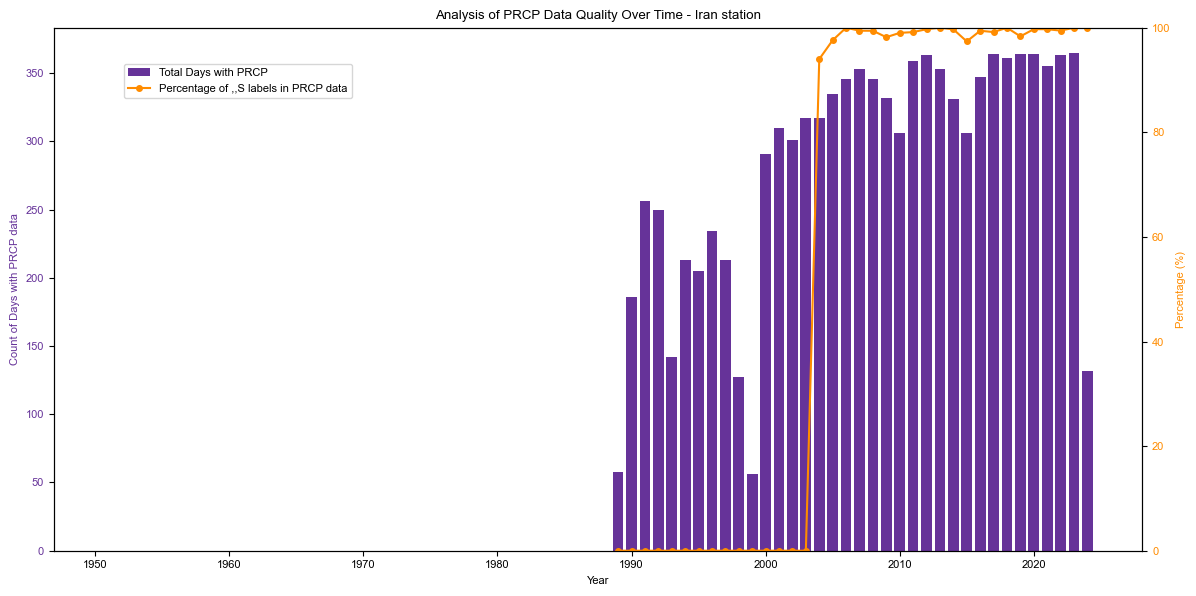

In [15]:
#ghcndaily
import pandas as pd
import matplotlib.pyplot as plt

# Identify the file path (load in from the server)
IR000040484 = '/Users/cmor7802/repos/sandbox/IR000040848.csv'

# Load data using Pandas
IR000040484_df = pd.read_csv(IR000040484, header=0)

# Set global font properties
plt.rcParams['font.size'] = 8
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.style'] = 'normal'

import pandas as pd
import matplotlib.pyplot as plt

# Assuming climatedata_df is already loaded and 'DATE' converted to datetime
IR000040484_df['DATE'] = pd.to_datetime(IR000040484_df['DATE'])
IR000040484_df['YEAR'] = IR000040484_df['DATE'].dt.year

# Count non-missing 'PRCP'
IR000040484_df['NON_MISSING_PRCP'] = ~IR000040484_df['PRCP'].isna()

# Identify non-missing 'PRCP' that is exactly marked as ',,S' in 'PRCP_ATTRIBUTES'
IR000040484_df['NON_MISSING_S_PRCP'] = IR000040484_df['NON_MISSING_PRCP'] & (IR000040484_df['PRCP_ATTRIBUTES'] == ',,S')

# Group by 'YEAR' and count NaNs for 'PRCP', non-missing, and non-missing marked as ',,S'
annual_non_missing_counts = IR000040484_df.groupby('YEAR')['NON_MISSING_PRCP'].sum()
annual_non_missing_s_counts = IR000040484_df.groupby('YEAR')['NON_MISSING_S_PRCP'].sum()

# Calculate the percentage of non-missing 'PRCP' that is ',,S'
percentage_non_missing_s = (annual_non_missing_s_counts / annual_non_missing_counts) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for total NaN days
ax1.bar(annual_non_missing_counts.index, annual_non_missing_counts, color='rebeccapurple', label='Total Days with PRCP')
ax1.set_xlabel('Year')
ax1.set_ylabel('Count of Days with PRCP data', color='rebeccapurple')
ax1.tick_params(axis='y', labelcolor='rebeccapurple')

# Create a second y-axis for the percentage
ax2 = ax1.twinx()
ax2.plot(percentage_non_missing_s.index, percentage_non_missing_s, color='darkorange', marker='o', markersize=4, linestyle='-', label='Percentage of ,,S labels in PRCP data')
ax2.set_ylabel('Percentage (%)', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')
ax2.set_ylim(0, 100)

# Title and legend
plt.title('Analysis of PRCP Data Quality Over Time - Iran station')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.savefig('IR000040484-PRCPdata-analysis.png', format='png', dpi=300)

plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os
from io import StringIO

def download_and_plot(url):
    # Download CSV file
    response = requests.get(url)
    response.raise_for_status()  # Ensure the download was successful
    
    # Load data using Pandas
    df = pd.read_csv(StringIO(response.text), header=0)
    
    # Convert 'DATE' to datetime and extract the year
    df['DATE'] = pd.to_datetime(df['DATE'])
    df['YEAR'] = df['DATE'].dt.year

    # Calculate non-missing 'PRCP' and identify ',,S' marked ones
    df['NON_MISSING_PRCP'] = ~df['PRCP'].isna()
    df['NON_MISSING_S_PRCP'] = df['NON_MISSING_PRCP'] & (df['PRCP_ATTRIBUTES'] == ',,S')

    # Group and count
    annual_non_missing_counts = df.groupby('YEAR')['NON_MISSING_PRCP'].sum()
    annual_non_missing_s_counts = df.groupby('YEAR')['NON_MISSING_S_PRCP'].sum()

    # Calculate the percentage
    percentage_non_missing_s = (annual_non_missing_s_counts / annual_non_missing_counts) * 100

    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.bar(annual_non_missing_counts.index, annual_non_missing_counts, color='rebeccapurple', label='Total Days with PRCP')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Count of Days with PRCP data', color='rebeccapurple')
    ax1.tick_params(axis='y', labelcolor='rebeccapurple')

    ax2 = ax1.twinx()
    ax2.plot(percentage_non_missing_s.index, percentage_non_missing_s, color='darkorange', marker='o', markersize=4, linestyle='-', label='Percentage of ,,S labels in PRCP data')
    ax2.set_ylabel('Percentage (%)', color='darkorange')
    ax2.tick_params(axis='y', labelcolor='darkorange')
    ax2.set_ylim(0, 100)

    plt.title(f'Analysis of PRCP Data Quality Over Time - {os.path.basename(url)}')
    fig.tight_layout()
    fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

    # Save the plot with the CSV name
    plt.savefig(os.path.basename(url).replace('.csv', '-analysis.png'), format='png', dpi=300)
    plt.close(fig)  # Close the plot to free memory

# List of URLs to process
urls = [
    'https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/ACW00011604.csv',
    'https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/ACW00011647.csv'
]

# Loop through URLs, download data, and create plots
for url in urls:
    download_and_plot(url)
